# Network Creation iNaturalist project

This notebook shows how the social interaction networks are created from the observations data.

A connection is created between two users A and B if user A has made an identification of an observation by user B, or vice versa.

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime

In [7]:

import seaborn as sns

cities_years = {
    'London': [2018, 2019, 2020]
 #   'Los_Angeles': [2017, 2018, 2019, 2020],
 #   'San_Francisco': [2017, 2018, 2019, 2020],
}



cities_colors = {
    'London': sns.color_palette("Blues", n_colors = 3), # 3 years 
    'Los_Angeles': sns.color_palette("Reds", n_colors = 4), # 4 years 
    'San_Francisco': sns.color_palette("Greens", n_colors = 4),
}

# Read networks 

# Plot networks 
We will use severl packages for construction of networks: newulf and networkx.

In [3]:
GL2018 = nx.read_gpickle("networks/network_London_2018.gpickle")


In [ ]:
#G = nx.path_graph(4)
#nx.write_gpickle(G, "test.gpickle")
GL2018 = nx.read_gpickle("networks/network_London_2018.gpickle")
GL2019 = nx.read_gpickle("networks/network_London_2019.gpickle")
GL2020 = nx.read_gpickle("networks/network_London_2020.gpickle")

GA2017 = nx.read_gpickle("networks/network_Los_Angeles_2017.gpickle")
GA2018 = nx.read_gpickle("networks/network_Los_Angeles_2018.gpickle")
GA2019 = nx.read_gpickle("networks/network_Los_Angeles_2019.gpickle")
GA2020 = nx.read_gpickle("networks/network_Los_Angeles_2020.gpickle")

GS2017 = nx.read_gpickle("networks/network_San_Francisco_2017.gpickle")
GS2018 = nx.read_gpickle("networks/network_San_Francisco_2018.gpickle")
GS2019 = nx.read_gpickle("networks/network_San_Francisco_2019.gpickle")
GS2020 = nx.read_gpickle("networks/network_San_Francisco_2020.gpickle")


In [ ]:


def draw_network(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
    print(degree_sequence) 
    node_color = degree_sequence # assign node colors
    # we choose max and min degree for colorbars
    vmin = min(degree_sequence) #.min() 
    vmax = max(degree_sequence) # .max()
    cmap = plt.cm.coolwarm

    # we plot network with colorbars
    #nx.draw_networkx(G, node_color=degree_sequence,node_size=10, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.figure(figsize = (15, 10)) # set size of figure
    nx.draw(G, node_color = degree_sequence, node_size=10)

#draw_network(GL2018)
#draw_network(GL2019)

print("visualising network")
#visualisation using netwulf
stylized_network, config = nw.visualize(GL2018)

In [13]:
import networkx as nx
import netwulf as nw

GL2018 = nx.read_gpickle("networks/network_London_2018.gpickle")
GL2019 = nx.read_gpickle("networks/network_London_2019.gpickle")


stylized_network, config = nw.visualize(GL2018)

In [6]:
#!pip install netwulf 

In [5]:
import networkx as nx
import netwulf as nw

#G = nx.barabasi_albert_graph(100,2)
#stylized_network, config = nw.visualize(G)

# Load data

In [8]:
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []

# data should be taken from raw/observations
for city, years in cities_years.items():
    for year in years:
        print("Loading: ", city, year)
        df = pd.read_csv("data/CNC_{}_{}.csv".format(city, year)) #raw/observations_v2/
        dfs[city][year] = df
        dfall.append(df)

# only data for London
dfall = pd.concat(dfall)
dfs['London'][2018].head()



Loading:  London 2018
Loading:  London 2019
Loading:  London 2020


,id,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,...,preferred_common_name,iconic_taxon_name,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27T07:52:34+00:00,Etc/UTC,2018-04-27T07:06:17+00:00,2018-04-27T09:26:56+00:00,NaN,159021,muki,research,...,lesser celandine,Plantae,species,204212,True,False,False,27624,27624,"[{'user_id': 353381, 'category': 'improving', ..."
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27T08:39:41+01:00,Europe/London,2018-04-27T09:02:52+01:00,2019-01-29T21:16:34+00:00,NaN,664459,lucyrobinsonnhm,research,...,Feral Pigeon,Aves,variety,3017,False,False,False,43329,43329,"[{'user_id': 29729, 'category': 'supporting', ..."
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27T08:34:31+02:00,Europe/Amsterdam,2018-04-27T10:42:01+02:00,2018-04-27T13:01:49+02:00,NaN,908315,tess26,casual,...,Spanish Bluebell,Plantae,species,56095,False,False,False,2813,2813,"[{'user_id': 908315, 'category': 'leading', 'd..."
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27T09:54:35+02:00,Europe/Amsterdam,2018-04-27T10:54:45+02:00,2018-04-27T22:23:41+02:00,NaN,796473,bryonycross,research,...,Green Alkanet,Plantae,species,156638,False,False,False,4639,4639,"[{'user_id': 160, 'category': 'improving', 'di..."
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27T08:42:21+01:00,Europe/London,2018-04-27T11:09:55+01:00,2018-04-27T16:37:31+01:00,NaN,664459,lucyrobinsonnhm,research,...,London Plane,Plantae,hybrid,49664,False,False,False,5866,5866,"[{'user_id': 160, 'category': 'supporting', 'd..."


# Create networks

In [9]:
def get_edges(df):
    """ Get the edges from the observation data 
    
    The nodes are the users, encoded as 'source' and 'target'.
    An edge between two users A and B means that the users had at least one interaction.
    An interaction means that either user A has identified an observation by user B,
    or the other way around. 
    The weight of an edge is how many such interactions ocurred.
    
    Parameters:
    -----------
     - df: pd.DataFrame
         A dataframe of observations
        
    Returns:
    --------
     - edges: pd.DataFrame
         A dataframe containing the edges (interactions) between users.
         Columns are: source | target | weight
         Interactions are only counted once, i.e. if there is an edge A->B there is
         no additional edge B->A included (to avoid double counting when
         constructing the network)
    """
    edges_list = []
    df = df[~df['identifications'].isna()]
    for _, row in df.iterrows():
#         if type(row['identifications'])==str:
#             print(row['identifications'])
        idents = eval(row['identifications'])
        user_target = row['user_id']
        for ident in idents:
    #         if ident['category'] in ['supporting', 'improving']
            user_source = ident['user_id']
            if user_source != user_target:
                edges_list.append(sorted([user_source, user_target]))

#     return edges_list
    edges = pd.DataFrame(edges_list, columns=['source', 'target'])
    edges = edges.convert_dtypes()
    edges['weight'] = 1
    edges = edges.groupby(by=['source', 'target']).sum().reset_index()
    return edges

def get_network(df):
    edges = get_edges(df)
    g = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight', create_using=nx.Graph)
    set_node_attribute_weight(g)
    return g


def get_node_weights(g):
    """ Get the weight W of all nodes
    
    The weight W of a node is the sum of the weights w of all edges connected to this node
    """
    nodes = g.nodes()
    Ws = {}
    for node in nodes:
        edges = g.edges(node)
        W = 0
        for edge in edges:
            w = g.get_edge_data(*edge, 'weight')['weight']
            W += w
        Ws[node] = W
    return Ws

def set_node_attribute_weight(g):
    Ws = get_node_weights(g)
    nx.set_node_attributes(g, Ws, name='W')
    nx.set_node_attributes(g, Ws, name='size')
    
    return g
    

def get_all_networks(dfs, cities_years):

    from collections import defaultdict
    Gs = defaultdict(dict)

    for city, years in cities_years.items():
        for year in years:
            print("Converting: ", city, year)
            df = dfs[city][year]
            g = get_network(df)
            g = set_node_attribute_weight(g)
            Gs[city][year] = g
            
    return Gs

# dfall_net = pd.concat(dfall_net)
# dfs_net['London'][2018].head()

In [10]:
Gs = get_all_networks(dfs, cities_years)

Converting:  London 2018
Converting:  London 2019
Converting:  London 2020


# Save networks

In [11]:
def save_networks(Gs):
    for city, graphs_years in Gs.items():
        for year, g in graphs_years.items():
            fname = "../data/networks/network_{}_{}.gpickle".format(city, year)
            print("Saving ", fname)
            nx.write_gpickle(g, fname)

save_networks(Gs)

Saving  ../data/networks/network_London_2018.gpickle
Saving  ../data/networks/network_London_2019.gpickle
Saving  ../data/networks/network_London_2020.gpickle
Saving  ../data/networks/network_Los_Angeles_2017.gpickle
Saving  ../data/networks/network_Los_Angeles_2018.gpickle
Saving  ../data/networks/network_Los_Angeles_2019.gpickle
Saving  ../data/networks/network_Los_Angeles_2020.gpickle
Saving  ../data/networks/network_San_Francisco_2017.gpickle
Saving  ../data/networks/network_San_Francisco_2018.gpickle
Saving  ../data/networks/network_San_Francisco_2019.gpickle
Saving  ../data/networks/network_San_Francisco_2020.gpickle


# Load networks

In [3]:
def load_all_networks(cities_years):
    from collections import defaultdict
    Gs = defaultdict(dict)
    for city, years in cities_years.items():
        for year in years:
            g = load_network(city, year)
            Gs[city][year]=g
    return Gs

def load_network(city, year):
    g = nx.read_gpickle('../data/networks/network_{}_{}.gpickle'.format(city,year))
    return g

Gs_loaded = load_all_networks(cities_years)

# Visualization

In [4]:
from netwulf import visualize
visualize(Gs_loaded['London'][2018])

(None, None)

# Map user groups

In [5]:
user_cluster_data = pd.read_csv("outputs/ident_obs_clusters_v2.csv")

In [26]:
def map_users_to_clusters(user_list, user_cluster_data, city, year):
    user_cluster_city = user_cluster_data[(user_cluster_data['city']==city.replace("_", " ")) & (user_cluster_data['year']==year)]
    
    user_cluster_map = user_cluster_city.set_index(['user_id'])['cluster']
    # list(map(list(g.nodes()), user_cluster_map))
    clusters = {user: user_cluster_map[user] if user in user_cluster_map.keys() else '-1'  for user in nodes }
    return clusters
    
# city = 'Los_Angeles'
city = 'London'
# city = 'San_Francisco'
year = 2019

g = Gs_loaded[city][year]
nodes = list(g.nodes())
node_clusters = map_users_to_clusters(nodes, user_cluster_data, city, year)

nx.set_node_attributes(g, values=node_clusters, name='cluster')

In [27]:
# Set colors based on cluster
import seaborn as sns
# cluster_labels = sorted(np.unique(list(node_clusters.values())))
# cluster_labels = ['A', 'B', 'C', 'D', '-1']
# cluster_labels = ['A', 'B', 'C', 'D', '-1']
cluster_labels = ['B', 'D', 'A', 'C', '-1']
colors_pal = sns.color_palette('tab10', n_colors=len(cluster_labels)).as_hex()
cluster_to_color = {cluster: color for cluster, color in zip(cluster_labels, colors_pal)}
node_colors = {node: cluster_to_color[cluster] for node, cluster in node_clusters.items()}
nx.set_node_attributes(g, values=node_colors, name='group')

In [ ]:
from netwulf import visualize
# Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
# G0 = g.subgraph(Gcc[0])
# visualize(G)
visualize(g)

In [19]:
cluster_labels

['B', 'D', 'A', 'C', '-1']

In [21]:
cluster_labels

['B', 'D', 'A', 'C', '-1']

# Analyze networks 
Plot and calculate network measures. 

In [5]:
import networkx as nx


# 1. load a network 
G = GL2018
# 2. Calculate measures for each node
deg = nx.degree_centrality(G) # gives a dictionary!!!
#print(deg)
#print(G.degree())
#print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
#print(degree_sequence) 



# 3. Draw network with node colors defined by degree
#plt.figure(figsize = (4, 4)) # set size of figure
#node_color = degree_sequence # assign node colors
#nx.draw(G, node_color = degree_sequence)



In [10]:
import numpy as np
import seaborn

def degree_loglogplot(G):
    m=1 # parameter
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(12, 8)) 
    plt.loglog(degrees[m:], degree_freq[m:],'go-') 
    plt.xlabel('Degree')
    plt.ylabel('Frequency')



def measures_for_network(G):
    # -*- coding: utf-8 -*-
    
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()
    
    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()    
    
    
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    seaborn.distplot(list(nx.clustering(G).values()), bins=20)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    
    print('average neighbor degree', nx.average_degree_connectivity(G))
    
    print('average neighbor degree', nx.average_neighbor_degree(G))
    
    print('average clustering')
    avclus = nx.average_clustering(G)
    #print(avclus)
    
    
    
    components = nx.connected_components(G)
    #print('components', components)
    #[[1, 2, 3], ['spam']]
    
    
    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}
    
    
    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



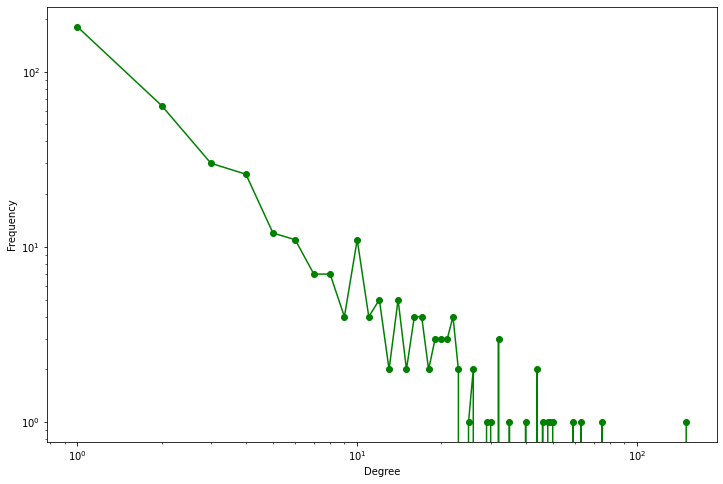

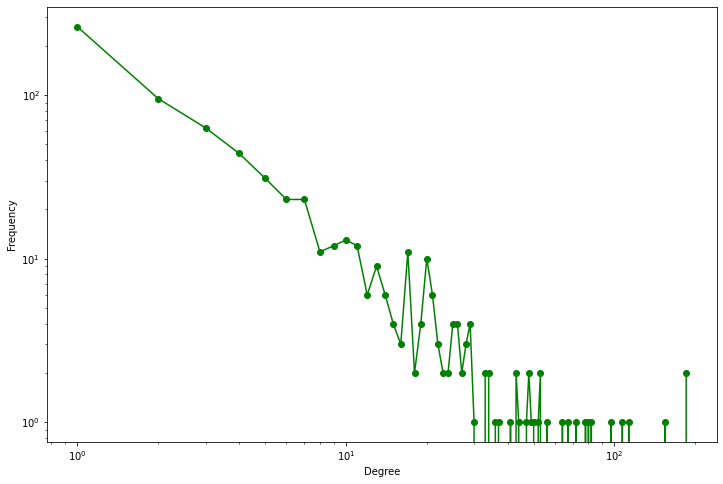

In [14]:
#measures_for_network(G)
degree_loglogplot(G)
plt.savefig("degreeplot.png")

degree_loglogplot(GL2019)
plt.savefig("degreeplotLondon2019.png")


In [25]:
# Set colors based on degree 
import seaborn as sns
# cluster_labels = sorted(np.unique(list(node_clusters.values())))
# cluster_labels = ['A', 'B', 'C', 'D', '-1']
# cluster_labels = ['A', 'B', 'C', 'D', '-1']
node_clusters = dict(G.degree) # cluster based on degree

cluster_labels = (np.unique(degree_sequence)).tolist() # ['B', 'D', 'A', 'C', '-1']
colors_pal = sns.color_palette('tab10', n_colors=len(cluster_labels)).as_hex()
cluster_to_color = {cluster: color for cluster, color in zip(cluster_labels, colors_pal)}
node_colors = {node: cluster_to_color[cluster] for node, cluster in node_clusters.items()}
nx.set_node_attributes(G, values=node_colors, name='group')

In [27]:
from netwulf import visualize
# Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
# G0 = g.subgraph(Gcc[0])
# visualize(G)
visualize(G)

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 57686)
Traceback (most recent call last):
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\http\server.py", line 653, in __init__
    super().__init__(*args, **kwargs)
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\socketserver.py", line 720, in __init__
    self.handle()
  File "c:\users\lyubo\appdata\local\programs\python\python39\lib\http\server.

(None, None)

# Analysis 

Are the most central nodes observers or identifiers?
For this we aim to check the correlation between degree of a node and number of observations vs. number of identifications of a user. 

Example of a data: 

 	user_id 	obs_count 	ident_count 	city 	year
0 	353381 	567.0 	7.0 	London 	2018
1 	664459 	150.0 	24.0 	London 	2018


In [28]:
# load the data on how many observations each user has 
user_cluster_data = pd.read_csv("outputs/ident_obs_clusters_v2.csv")
n_obs = user_cluster_data["obs_count"] 
n_iden = user_cluster_data["ident_count"] 
#let us control for the same order in the array and plot the degree vs. identification/observations

# load the data on degree in a network  

# correlate the values between two arrays 
np.corrcoef(n_obs,n_iden)


In [29]:
user_cluster_data.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:e8534ffdc5058d63e46eb64a8ff7a1b400b...
1,size 1515493
